In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
from dateutil.relativedelta import relativedelta

In [2]:
df = pd.read_csv('oil_price.csv')

In [3]:
df.head()

,Date,Open,High,Low,Close,Unnamed: 5,Unnamed: 6
0,1/4/2000,23.90,24.70,23.89,24.39,NaN,NaN
1,1/5/2000,24.25,24.37,23.70,23.73,NaN,NaN
2,1/6/2000,23.55,24.22,23.35,23.62,NaN,NaN
3,1/7/2000,23.57,23.98,23.05,23.09,NaN,NaN
4,1/10/2000,23.04,23.78,23.04,23.73,NaN,NaN


In [4]:
df.drop(columns = ['Unnamed: 5', 'Unnamed: 6'], inplace = True)

In [5]:
df['Date'] = [dt.datetime.strptime(date_str, '%m/%d/%Y').date() for date_str in df['Date']]

In [6]:
df.set_index('Date', inplace = True)

In [7]:
df.head()

,Open,High,Low,Close
Date,,,,
2000-01-04,23.90,24.70,23.89,24.39
2000-01-05,24.25,24.37,23.70,23.73
2000-01-06,23.55,24.22,23.35,23.62
2000-01-07,23.57,23.98,23.05,23.09
2000-01-10,23.04,23.78,23.04,23.73


In [8]:
# Make a column for After hour trading (Previous day close to current day open)

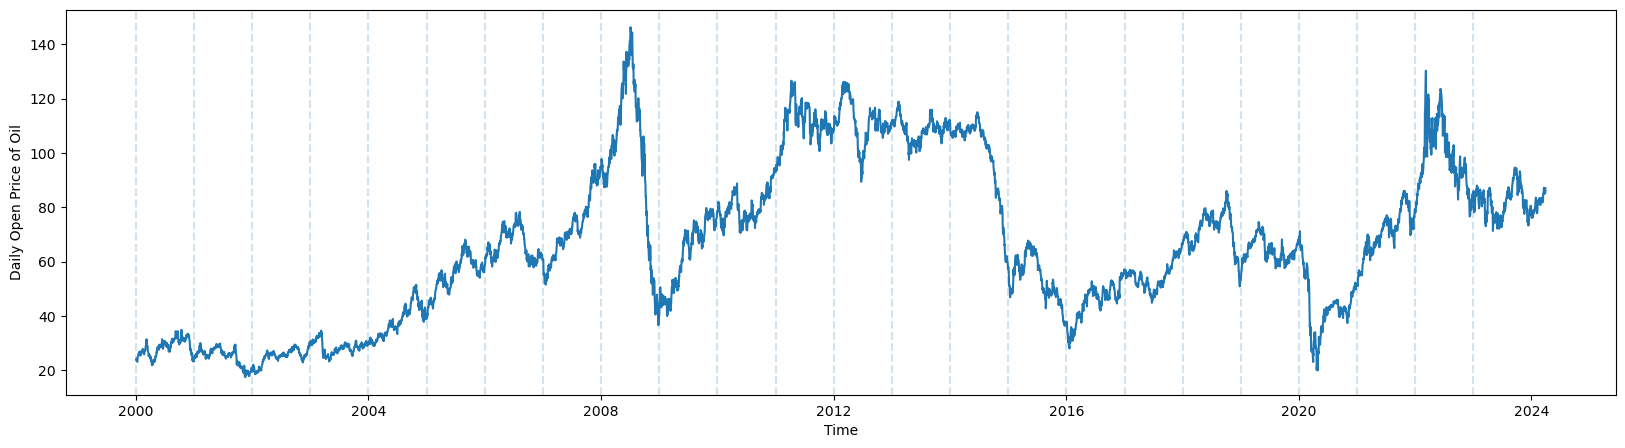

In [101]:
plt.figure(figsize = (20, 5))
plt.plot(df['Open'])
plt.xlabel('Time')
plt.ylabel('Daily Open Price of Oil')

for year in range(2000, 2024):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), linestyle = '--', alpha = 0.2)

plt.show()

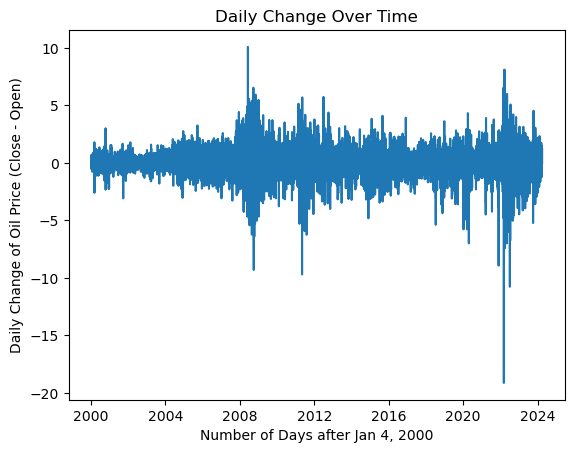

In [10]:
plt.plot((df['Close'] - df['Open']))
plt.title('Daily Change Over Time')
plt.xlabel('Number of Days after Jan 4, 2000')
plt.ylabel('Daily Change of Oil Price (Close - Open)')
plt.show()

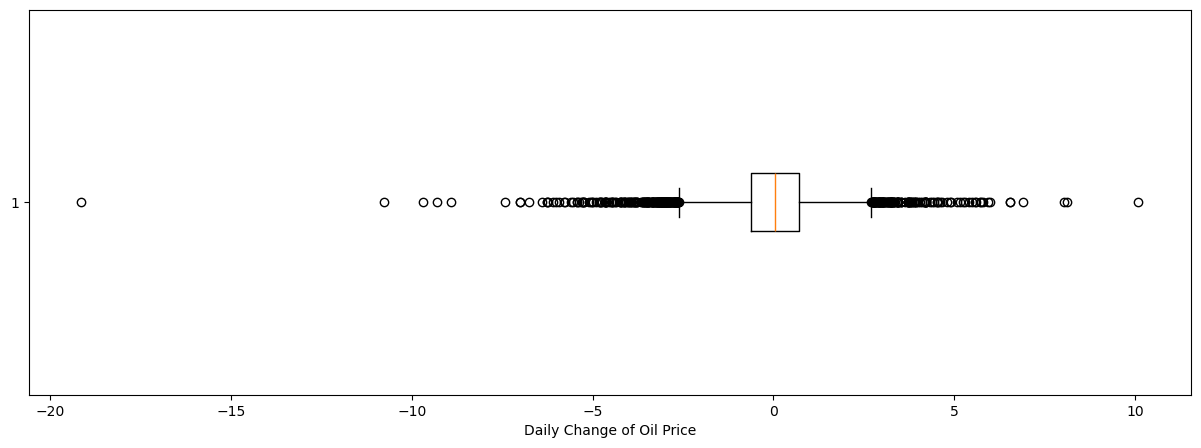

In [11]:
plt.figure(figsize = (15, 5))
plt.boxplot(df['Close'] - df['Open'], vert = False)
plt.xlabel('Daily Change of Oil Price')
plt.show()

In [12]:
np.min(df['Open'] - df['Close'])

-10.090000000000003

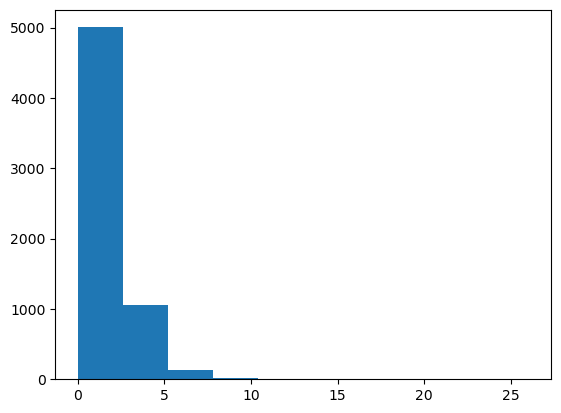

In [13]:
plt.hist(df['High'] - df['Low'])
plt.show()

In [14]:
np.median(df['Open'] - df['Close'])

-0.03999999999999915

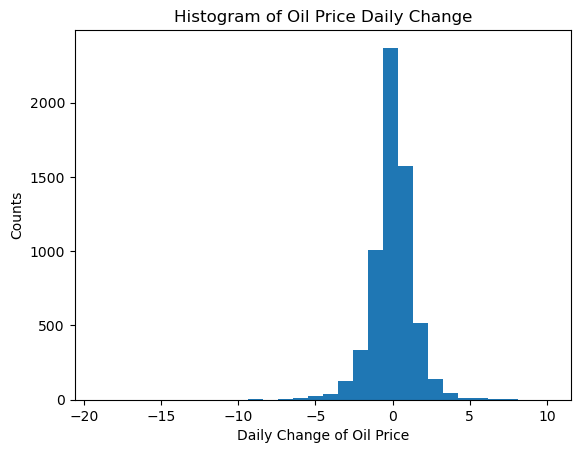

In [15]:
plt.hist(df['Close'] - df['Open'], bins = 30)
plt.title('Histogram of Oil Price Daily Change')
plt.xlabel('Daily Change of Oil Price')
plt.ylabel('Counts')
plt.show()

<Axes: xlabel='Date'>

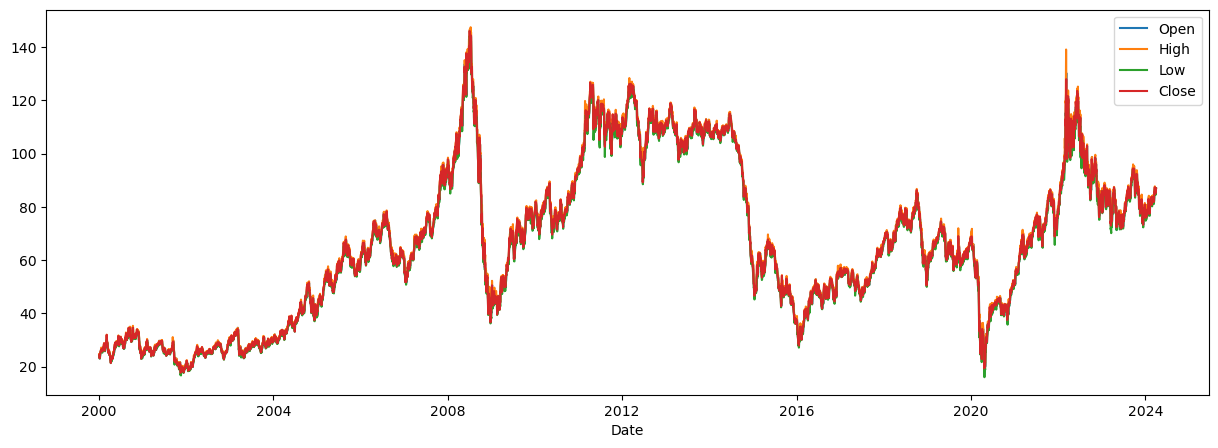

In [16]:
df.plot(figsize = (15, 5))

In [17]:
cpi = pd.read_csv('energy_cpi.csv')

In [18]:
cpi = cpi[cpi['Country'] == 'United States'].reset_index()

In [19]:
cpi = cpi.iloc[:, 365:-4]

In [20]:
cpi

,199912,200001,200002,200003,200004,200005,200006,200007,200008,200009,...,202206,202207,202208,202209,202210,202211,202212,202301,202302,202303
0,55.3,55.4,57.5,60.2,59.5,59.6,63.9,63.9,62.1,64.4,...,168.0,160.4,150.5,146.6,148.0,144.4,135.5,139.6,138.8,137.6


In [21]:
rates = []

for i in range(1, cpi.iloc[0:].values.shape[1]):
    rates.append((cpi.iloc[0, i] - cpi.iloc[0, i - 1]) / cpi.iloc[0, i - 1] * 100)

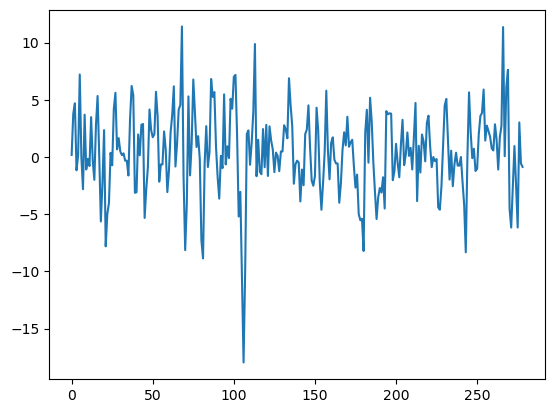

In [22]:
plt.plot(range(len(rates)), rates)

In [23]:
df.head()

,Open,High,Low,Close
Date,,,,
2000-01-04,23.90,24.70,23.89,24.39
2000-01-05,24.25,24.37,23.70,23.73
2000-01-06,23.55,24.22,23.35,23.62
2000-01-07,23.57,23.98,23.05,23.09
2000-01-10,23.04,23.78,23.04,23.73


In [24]:
cpi.head()

,199912,200001,200002,200003,200004,200005,200006,200007,200008,200009,...,202206,202207,202208,202209,202210,202211,202212,202301,202302,202303
0,55.3,55.4,57.5,60.2,59.5,59.6,63.9,63.9,62.1,64.4,...,168.0,160.4,150.5,146.6,148.0,144.4,135.5,139.6,138.8,137.6


In [25]:
start_date = dt.datetime(2000, 1, 1).date()
end_date = dt.datetime(2023, 3, 1).date()

dates = []
current_date = start_date

while(current_date <= end_date):
    dates.append(current_date)
    current_date += relativedelta(months = 1)

In [26]:
len(dates)

279

In [27]:
rates = np.array(rates)

In [28]:
rates = list(zip(dates, rates))

In [29]:
new_col = []

In [30]:
j = 0
for i in (range(len(rates))):
    cur_month = rates[i][0].month
    cur_year = rates[i][0].year
    while(df.index[j].month == cur_month) & (df.index[j].year == cur_year):
        new_col.append(rates[i][1])
        j += 1

In [31]:
len(new_col)

5973

In [32]:
df.shape

(6232, 4)

In [33]:
# Append NAs for months that we don't have inflation data for (After March 2023)
new_col = new_col + [None] * (df.shape[0] - len(new_col))

In [34]:
df['Inflation Rate'] = new_col

In [35]:
df.describe()

,Open,High,Low,Close,Inflation Rate
count,6232.000000,6232.000000,6232.000000,6232.000000,5973.000000
mean,66.823365,67.758793,65.845875,66.825907,0.384633
std,28.842932,29.129827,28.530619,28.856349,3.613129
min,17.400000,18.050000,15.980000,17.680000,-17.966696
25%,44.547500,45.467500,43.617500,44.522500,-1.535974
50%,64.860000,65.730000,63.910000,64.835000,0.376648
75%,86.005000,86.962500,85.000000,85.992500,2.678571
max,146.300000,147.500000,144.250000,146.080000,11.413043


In [36]:
df[df['High'] == max(df['High'])]

,Open,High,Low,Close,Inflation Rate
Date,,,,,
2008-07-11,142.14,147.5,141.62,144.49,1.91458


<Axes: xlabel='Date'>

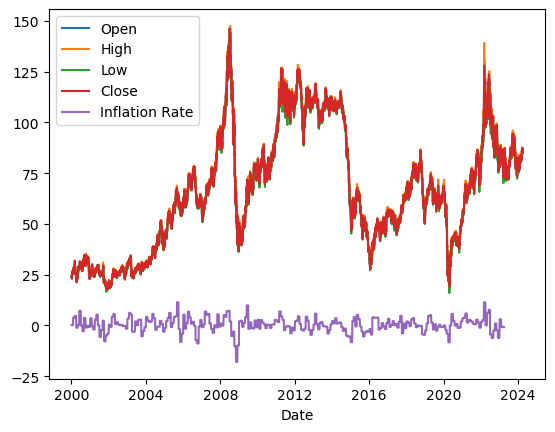

In [37]:
df.plot()

In [67]:
price_data = pd.read_csv('pricedata.csv')

In [68]:
# Volume is daily trading totals
price_data.head()

,Symbol,Date,Open,High,Low,Close,Volume,Currency
0,Brent Oil,1/4/2000,23.90,24.70,23.89,24.39,32509,USD
1,Brent Oil,1/5/2000,24.25,24.37,23.70,23.73,30310,USD
2,Brent Oil,1/6/2000,23.55,24.22,23.35,23.62,44662,USD
3,Brent Oil,1/7/2000,23.57,23.98,23.05,23.09,34826,USD
4,Brent Oil,1/10/2000,23.04,23.78,23.04,23.73,26388,USD


In [69]:
price_data['Symbol'].value_counts()

Heating Oil      5770
Brent Oil        5768
Crude Oil WTI    5744
Natural Gas      5742
Name: Symbol, dtype: int64

In [74]:
price_data['Date'] = [dt.datetime.strptime(date_str, '%m/%d/%Y').date() for date_str in price_data['Date']]

In [78]:
price_data.set_index(price_data['Date'], inplace = True)

In [79]:
price_data

,Symbol,Date,Open,High,Low,Close,Volume,Currency
Date,,,,,,,,
2000-01-04,Brent Oil,2000-01-04,23.9000,24.7000,23.8900,24.3900,32509,USD
2000-01-05,Brent Oil,2000-01-05,24.2500,24.3700,23.7000,23.7300,30310,USD
2000-01-06,Brent Oil,2000-01-06,23.5500,24.2200,23.3500,23.6200,44662,USD
2000-01-07,Brent Oil,2000-01-07,23.5700,23.9800,23.0500,23.0900,34826,USD
2000-01-10,Brent Oil,2000-01-10,23.0400,23.7800,23.0400,23.7300,26388,USD
...,...,...,...,...,...,...,...,...
2022-06-13,Heating Oil,2022-06-13,4.3612,4.3762,4.1949,4.2834,46406,USD
2022-06-14,Heating Oil,2022-06-14,4.2749,4.4570,4.2488,4.3940,36652,USD
2022-06-15,Heating Oil,2022-06-15,4.3816,4.6070,4.3557,4.5470,36908,USD


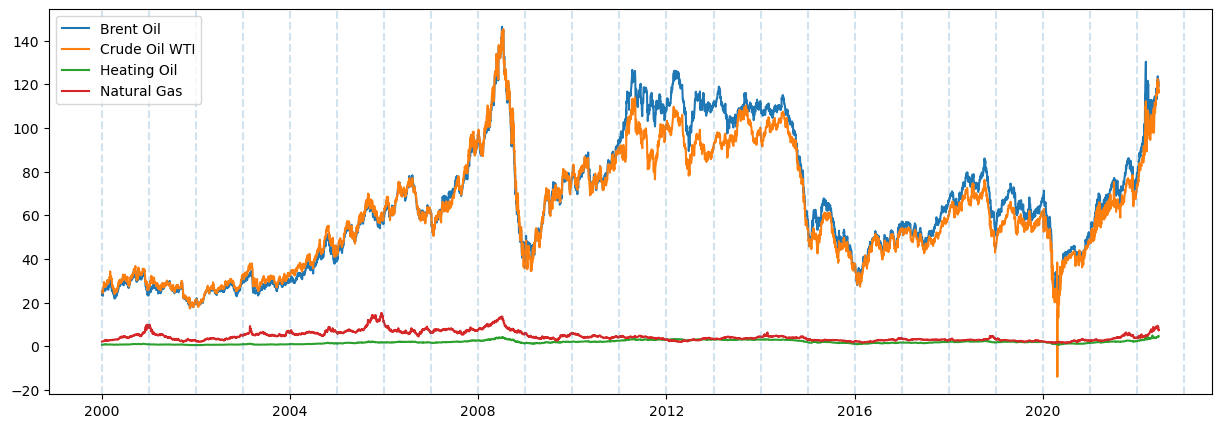

In [102]:
plt.figure(figsize = (15, 5))
for symbol, values in price_data.groupby(by = 'Symbol'):
    plt.plot(values['Open'], label = symbol)

for year in range(2000, 2024):
    plt.axvline(pd.to_datetime(str(year) + '-01-01'), linestyle = '--', alpha = 0.2)
    
plt.legend()
plt.show()

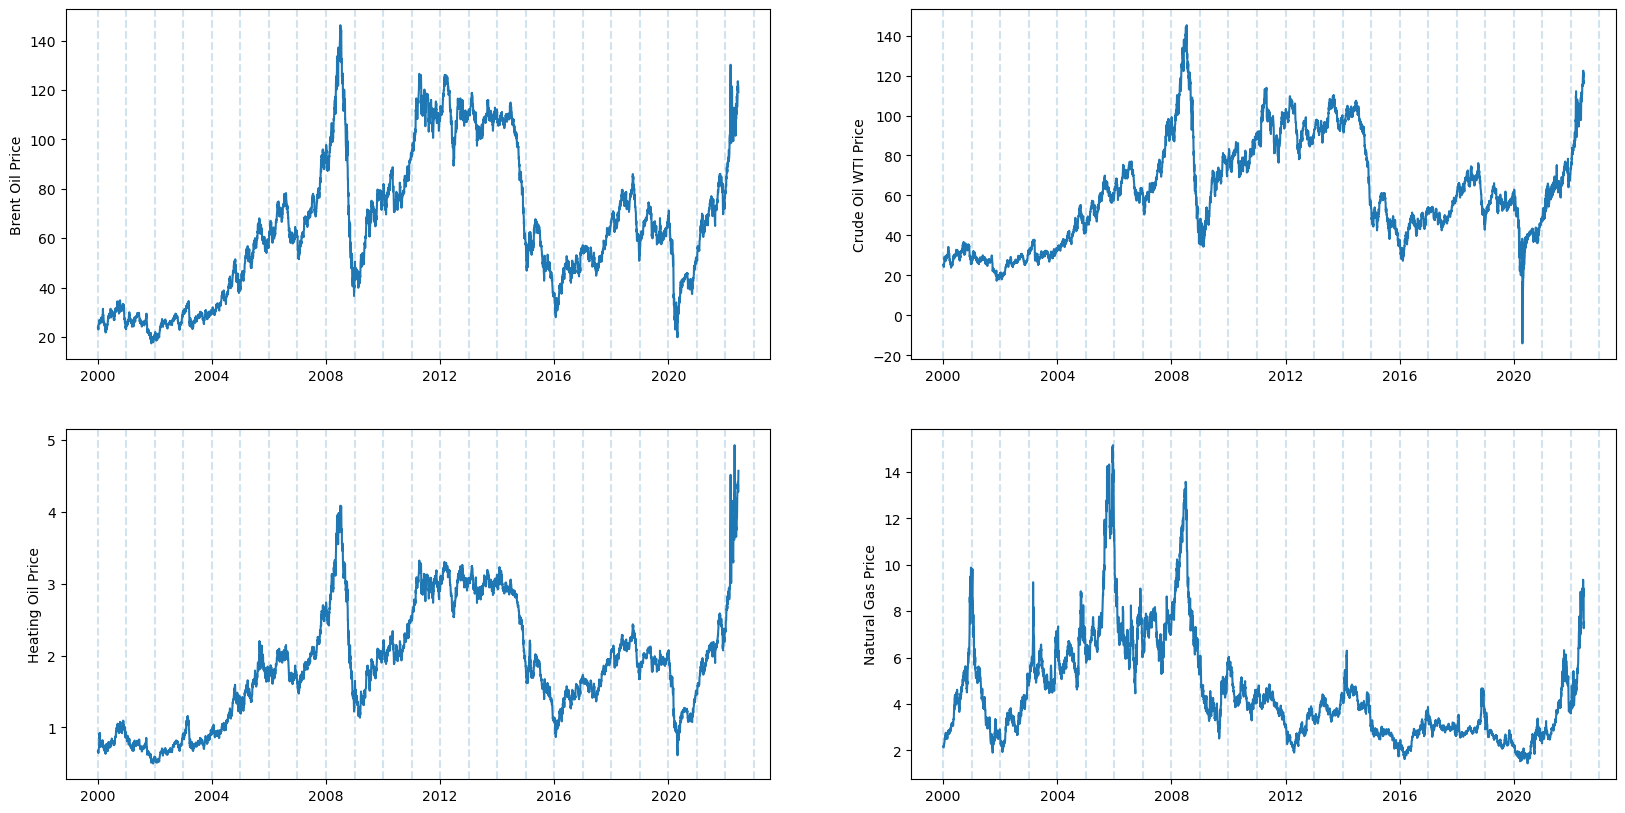

In [103]:
plt.figure(figsize = (20, 10))
for i, (symbol, values) in enumerate(price_data.groupby(by = 'Symbol')):
    plt.subplot(2, 2, i + 1)
    plt.plot(values['Open'])
    plt.ylabel(symbol + ' Price')
    for year in range(2000, 2024):
        plt.axvline(pd.to_datetime(str(year) + '-01-01'), linestyle = '--', alpha = 0.2)


plt.show()

In [45]:
price_data['Symbol'].value_counts()

Heating Oil      5770
Brent Oil        5768
Crude Oil WTI    5744
Natural Gas      5742
Name: Symbol, dtype: int64